**1. IMPORTACIONES Y LECTURA DE DATOS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Ajustamos la visualización de gráficas:
plt.style.use('ggplot')
# Ajustamos la configuración de visualización de Pandas para que muestre todas las columnas:
pd.options.display.max_columns = None

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets_colab/credits_limpio.csv')
df2 = pd.read_csv('/content/drive/MyDrive/datasets_colab/movies_dataset_limpio.csv')

# Dado que queremos hacer merge a los dataframes df1 y df2 con la columna en común "id",
# deberemos hacer que el tipo de dato de ambas columnas coincidan.

# Y como el tipo de los datos de la columna 'id' de df2 ya es str, trabajaremos df1:
df1['id']=df1['id'].astype(str)

# Ahora sí hacemos merge respecto a la columna 'id':
df = pd.merge(df1, df2, on='id', how='outer')

# Imprimimos:
print('Tamaño:',df.shape)
df.head(5)

<ipython-input-34-78309261c3d1>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/datasets_colab/movies_dataset_limpio.csv')


Tamaño: (45542, 22)


,id,cast_names,crew_names,budget,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,collection_name,genre_names,production_companies_names,production_countries_names,spoken_languages_names,release_year,return
0,862,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...",30000000.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['English'],1995.0,12.451801
1,8844,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...",65000000.0,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"['English', 'Français']",1995.0,4.043035
2,15602,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...",0.0,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,Grumpy Old Men Collection,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['English'],1995.0,0.000000
3,31357,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...",16000000.0,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['English'],1995.0,5.090760
4,11862,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...",0.0,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['English'],1995.0,0.000000


**2. COMPRENSIÓN DE LOS DATOS**

In [ ]:
df.columns

Index(['id', 'cast_names', 'crew_names', 'budget', 'original_language',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'collection_name', 'genre_names', 'production_companies_names',
       'production_countries_names', 'spoken_languages_names', 'release_year',
       'return'],
      dtype='object')

In [ ]:
df.dtypes

id                             object
cast_names                     object
crew_names                     object
budget                        float64
original_language              object
overview                       object
popularity                     object
release_date                   object
revenue                       float64
runtime                       float64
status                         object
tagline                        object
title                          object
vote_average                  float64
vote_count                    float64
collection_name                object
genre_names                    object
production_companies_names     object
production_countries_names     object
spoken_languages_names         object
release_year                    int64
return                        float64
dtype: object

In [ ]:
df.describe()

,budget,revenue,runtime,vote_average,vote_count,release_year,return
count,4.545500e+04,4.545500e+04,45206.000000,45452.000000,45452.000000,45452.000000,4.545500e+04
mean,4.230922e+06,1.121831e+07,94.179821,5.623962,109.987283,1991.882579,6.588962e+02
std,1.742869e+07,6.433710e+07,38.331639,1.915585,491.347202,24.057750,7.462836e+04
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


**3. COMPRENSIÓN DE LAS VARIABLES**

In [ ]:
df['release_year'].value_counts()

2014.0    1976
2015.0    1907
2013.0    1895
2012.0    1727
2011.0    1669
          ... 
2020.0       1
1887.0       1
1878.0       1
1874.0       1
1883.0       1
Name: release_year, Length: 135, dtype: int64

In [ ]:
# Vamos a convertir a int los tipos de dato de la columna 'release_year'

# Para ello, primero reemplazaremos los valores nulos por cero:
df['release_year'] = df['release_year'].fillna(0)

# Ahora convertimos todo a tipo int:
df['release_year'] = df['release_year'].astype(int)

Text(0, 0.5, 'Cantidad de películas estrenadas')

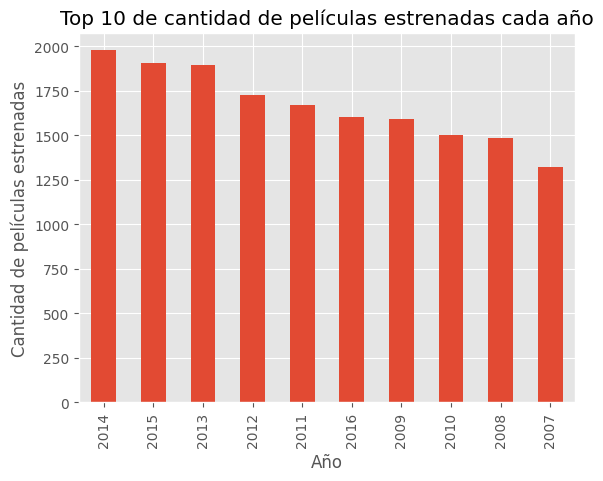

In [ ]:
# Gráfico de barras
ax = (df['release_year'].value_counts()
      .head(10)
      .plot(kind='bar', title='Top 10 de cantidad de películas estrenadas cada año'))
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de películas estrenadas')

Text(0.5, 0, 'Puntuación')

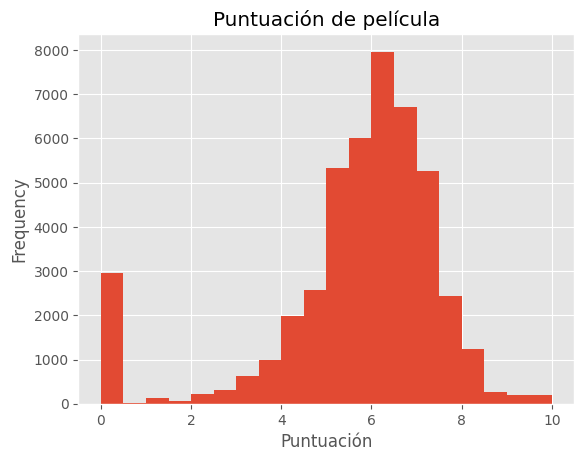

In [ ]:
# Histograma
ax = df['vote_average'].plot(kind='hist',bins=20,title='Puntuación de película')
ax.set_xlabel('Puntuación')

Text(0.5, 0, 'Puntuación')

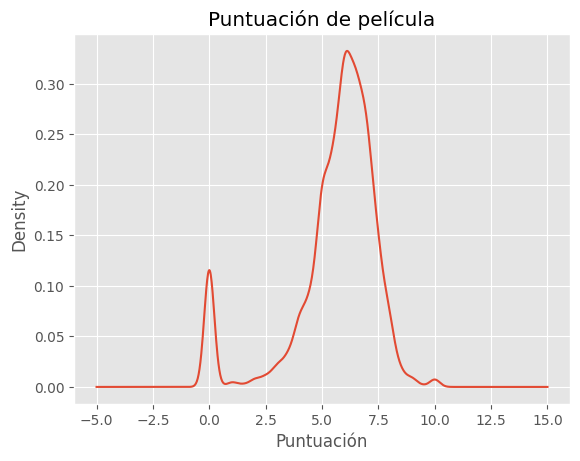

In [ ]:
# Estimación de la densidad de probabilidad
ax = df['vote_average'].plot(kind='kde',title='Puntuación de película')
ax.set_xlabel('Puntuación')

**4. RELACIONES ENTRE LAS VARIABLES**

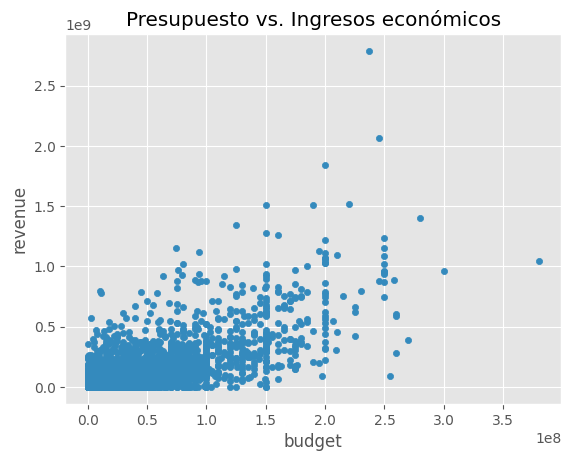

In [ ]:
# Diagrama de dispersión
df.plot(kind='scatter',
        x='budget',
        y='revenue',
        title='Presupuesto vs. Ingresos generados')
plt.show()

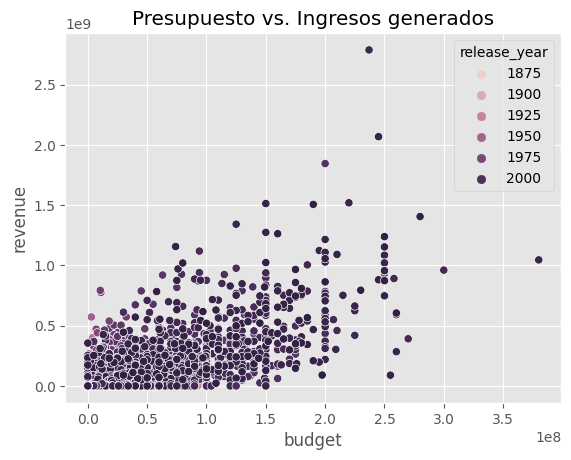

In [ ]:
# Diagrama de dispersión con color
ax = sns.scatterplot(x='budget',
                y='revenue',
                hue='release_year',
                data=df)
ax.set_title('Presupuesto vs. Ingresos generados')
plt.show()

In [ ]:
# Crearemos una nueva columna del dataframe para ser el hue de nuestro gráfico por pares

df['siglo_lanzamiento'] = df['release_year']//100+1

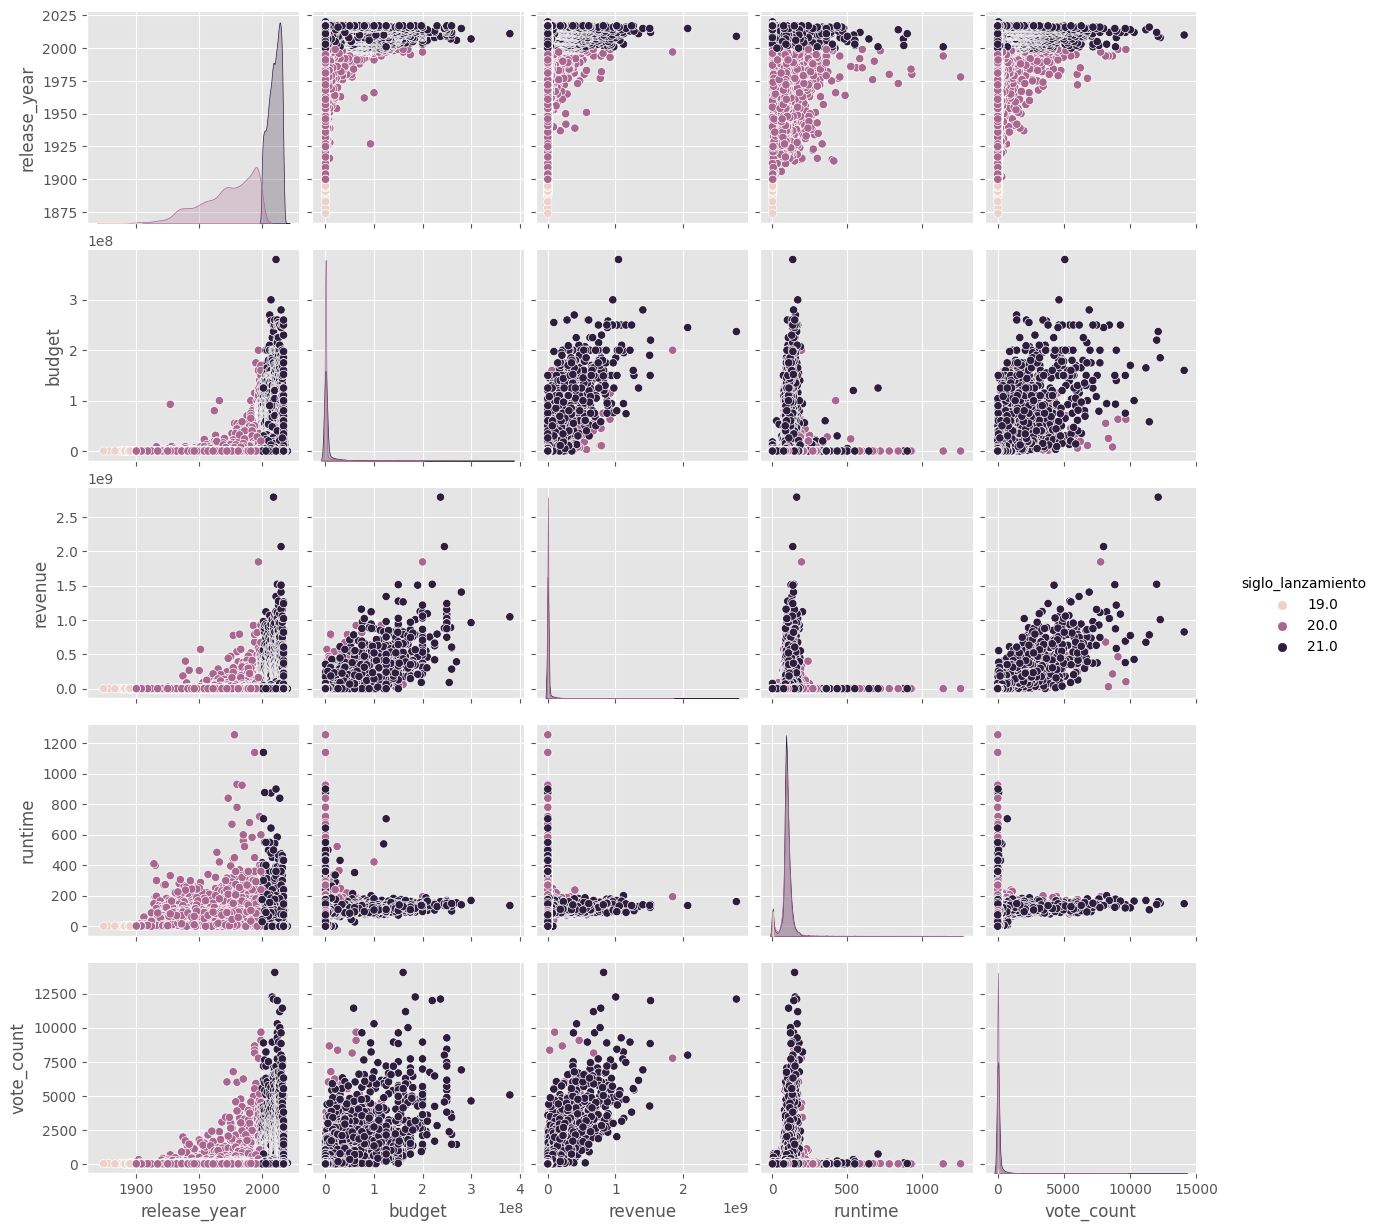

In [ ]:
# Gráfico por pares con color
sns.pairplot(df,
             vars=['release_year','budget',
                   'revenue','runtime','vote_count'],
            hue='siglo_lanzamiento')
plt.show()

In [ ]:
# Matriz de correlación
df_corr = df[['release_year','budget',
              'revenue','runtime',
              'vote_count']].dropna().corr()
df_corr

,release_year,budget,revenue,runtime,vote_count
release_year,1.000000,0.132199,0.088676,0.078877,0.107181
budget,0.132199,1.000000,0.768623,0.134822,0.676412
revenue,0.088676,0.768623,1.000000,0.103886,0.811959
runtime,0.078877,0.134822,0.103886,1.000000,0.113482
vote_count,0.107181,0.676412,0.811959,0.113482,1.000000


<Axes: >

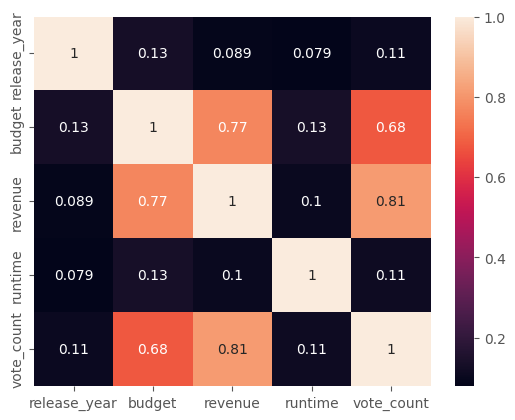

In [ ]:
# Mapa de calor de correlaciones
sns.heatmap(df_corr, annot=True)

Solo falta:
1. Hacer una pregunta sobre los datos y contestarla con una gráfica
2. Hacer una nube de palabras de las palabras más frecuentes del dataframe

**5. PREGUNTAS SOBRE LOS DATOS**

**5.1. ¿Cuáles son las películas más exitosas?**

(Top 10 de películas con mayor recaudación)



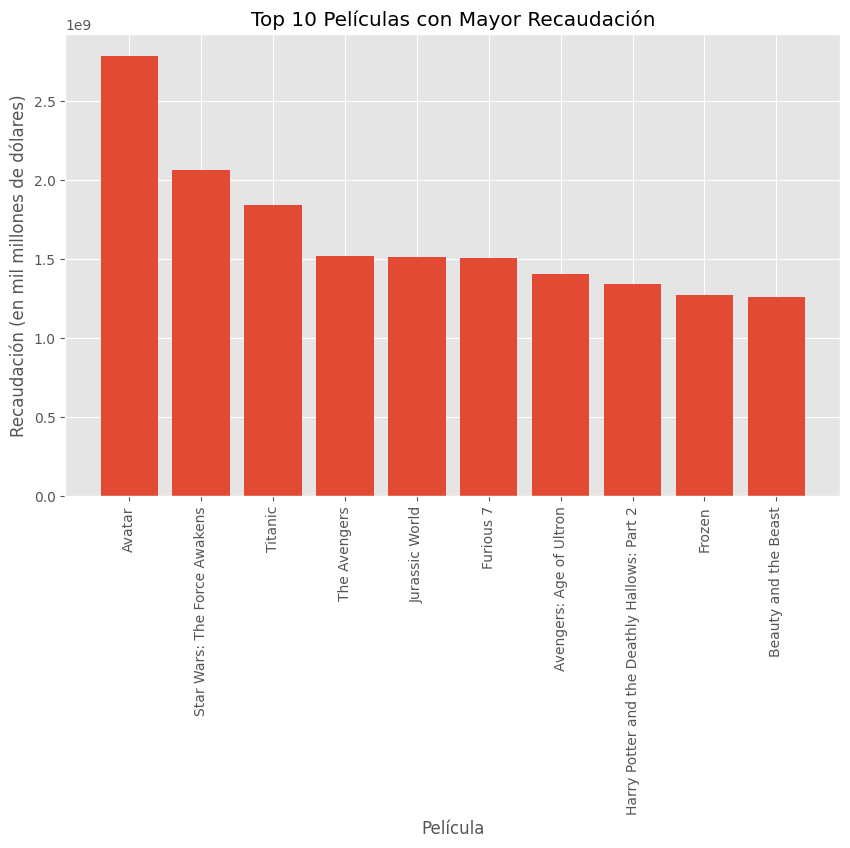

In [ ]:
# Creamos un dataframe ordenado respecto a la columma 'revenue' en orden descendente:
s = df.sort_values('revenue', ascending=False)

# Nos quedamos con las 10 primeras filas:
e = s.head(10)

# Establecemos el tamaño de la gráfica:
plt.figure(figsize=(10, 6))

# Creamos la gráfica:
plt.bar(e['title'], e['revenue'])

# Establecemos los nombres de etiquetas:
plt.xlabel('Película')
plt.ylabel('Recaudación (en mil millones de dólares)')
plt.title('Top 10 Películas con Mayor Recaudación')

# Establecemos la visualización de etiquetas del eje x en formato vertical
plt.xticks(rotation=90)

plt.show()


**5.2. ¿Cuáles son las palabras más frecuentes?**

(Nube de palabras)

**Palabras más frecuentes de la descripción general de la película**

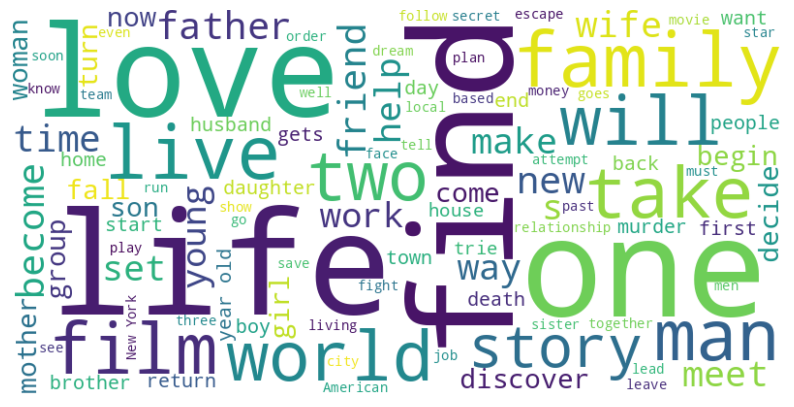

In [ ]:
# Nube de palabras respecto a la columna 'overview'

# Convertimos a str el tipo de dato de la columna 'overview':
df['overview'] = df['overview'].astype(str)

texto_overview = ' '.join(df['overview'])

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto_overview)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Palabras más frecuentes de todo el dataframe**

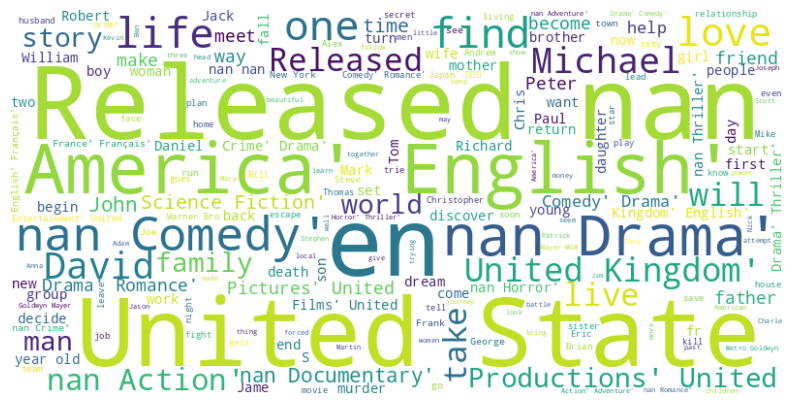

In [ ]:
# Nube de palabras de todo el dataframe

# Combinamos el texto de todas las columnas en una sola cadena
text = ' '.join(df.astype(str).values.flatten())

# Creamos un objeto WordCloud y generamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()